# Task 28-> Exploring Cross-Validation, Overfitting, and Underfitting


## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris, load_diabetes
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, LeaveOneOut, RepeatedKFold, TimeSeriesSplit
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

## Load the datasets


In [6]:
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

diabetes = load_diabetes()
X_diabetes = diabetes.data
y_diabetes = diabetes.target

## Split the Diabetes dataset for overfitting and underfitting examples


In [7]:
X_train_diabetes, X_test_diabetes, y_train_diabetes, y_test_diabetes = train_test_split(X_diabetes, y_diabetes, test_size=0.2, random_state=42)

## Split the Iris dataset into training and test sets


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

# Cross-Validation
## What is Cross-Validation?
Cross-validation is a statistical method used to estimate the skill of machine learning models. It is mainly used in settings where the goal is prediction, and one wants to estimate how accurately a predictive model will perform in practice. The key idea is to partition the data into multiple subsets (folds), use some of them to train the model, and use the remaining data to test it. This process is repeated multiple times with different partitions to ensure the model's performance is consistent and not dependent on specific data partitions.
<br>
## Parameters
### k (number of folds): 
Determines how many subsets the dataset is divided into.
### shuffle: 
Whether or not to shuffle the data before splitting into batches.
### random_state: 
Ensures reproducibility of the shuffling process.
## Types of Cross-Validation
## 1. K-Fold Cross-Validation:

The dataset is randomly divided into k equal-sized folds.<br>
For each fold, the model is trained on k-1 folds and tested on the remaining fold.<br>
This process is repeated k times, with each fold used exactly once as the test set.<br>
The results from each fold are averaged to produce a single estimation.<br>
Common values for k are 5 or 10.

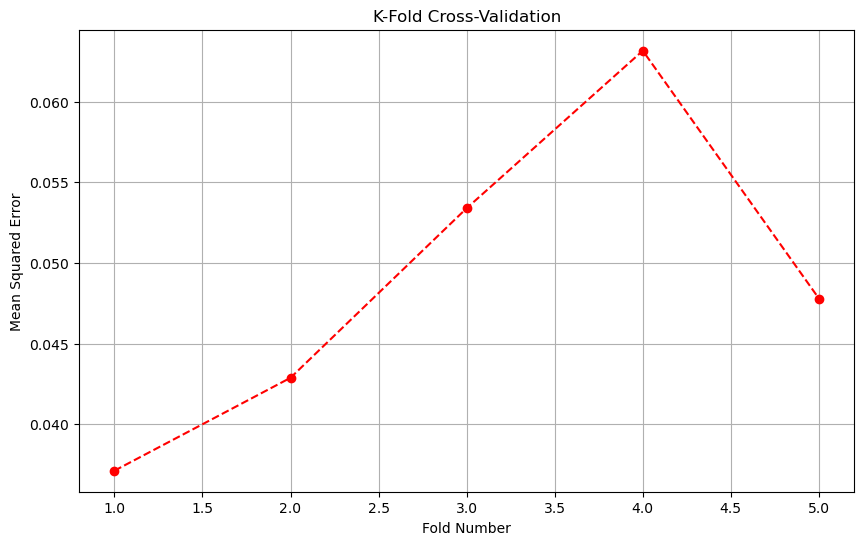

In [9]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
model = LinearRegression()
mse_scores = []

for train_index, test_index in kf.split(X_iris):
    X_train_kf, X_test_kf = X_iris[train_index], X_iris[test_index]
    y_train_kf, y_test_kf = y_iris[train_index], y_iris[test_index]
    model.fit(X_train_kf, y_train_kf)
    y_pred_kf = model.predict(X_test_kf)
    mse_scores.append(mean_squared_error(y_test_kf, y_pred_kf))

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(mse_scores) + 1), mse_scores, marker='o', linestyle='--', color='r')
plt.xlabel('Fold Number')
plt.ylabel('Mean Squared Error')
plt.title('K-Fold Cross-Validation')
plt.grid(True)
plt.show()

This graph displays the Mean Squared Error (MSE) across different folds. The x-axis represents the fold number, while the y-axis represents the MSE. Each point on the graph corresponds to the performance of the model on one of the folds. The red dashed line with markers highlights the average model performance across different folds, showing how the model's accuracy varies with each fold.

## 2. Stratified K-Fold Cross-Validation:

A variation of K-Fold where each fold contains approximately the same percentage of samples of each target class as the complete dataset.
This is particularly useful for imbalanced datasets.

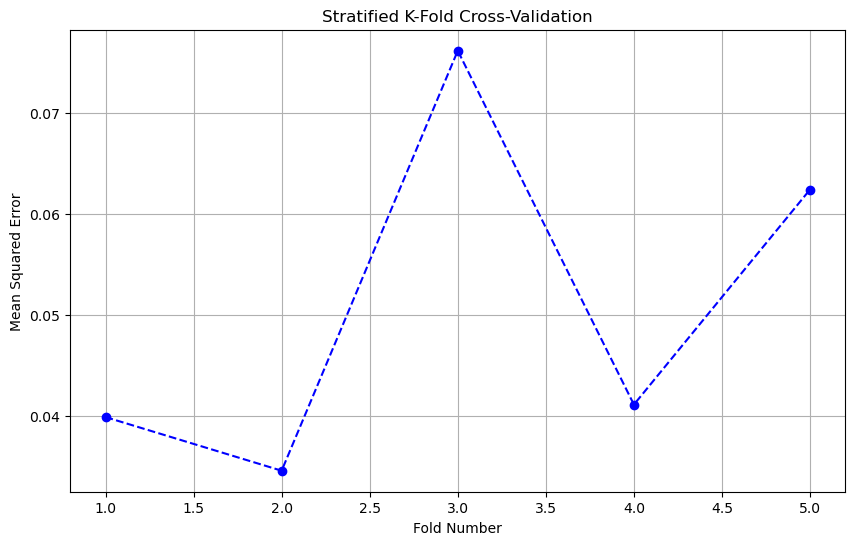

In [10]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
mse_scores_skf = []

for train_index, test_index in skf.split(X_iris, y_iris):
    X_train_skf, X_test_skf = X_iris[train_index], X_iris[test_index]
    y_train_skf, y_test_skf = y_iris[train_index], y_iris[test_index]
    model.fit(X_train_skf, y_train_skf)
    y_pred_skf = model.predict(X_test_skf)
    mse_scores_skf.append(mean_squared_error(y_test_skf, y_pred_skf))

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(mse_scores_skf) + 1), mse_scores_skf, marker='o', linestyle='--', color='b')
plt.xlabel('Fold Number')
plt.ylabel('Mean Squared Error')
plt.title('Stratified K-Fold Cross-Validation')
plt.grid(True)
plt.show()

This graph shows the MSE across different stratified folds. The x-axis represents the fold number, and the y-axis represents the MSE. The blue dashed line with markers indicates the model performance for each fold, ensuring that each fold has a similar distribution of classes.

## 3. Leave-One-Out Cross-Validation (LOOCV):

A special case of K-Fold where k equals the number of samples in the dataset.<br>
Each sample is used once as a test set, and the model is trained on all remaining samples.<br>
This method is computationally expensive but can give a very accurate estimate of model performance.


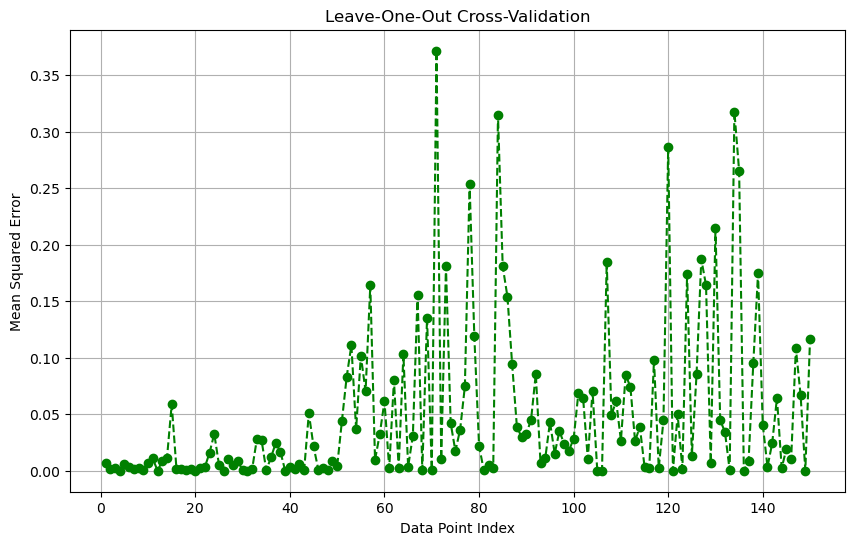

In [11]:
loo = LeaveOneOut()
mse_scores_loo = []

for train_index, test_index in loo.split(X_iris):
    X_train_loo, X_test_loo = X_iris[train_index], X_iris[test_index]
    y_train_loo, y_test_loo = y_iris[train_index], y_iris[test_index]
    model.fit(X_train_loo, y_train_loo)
    y_pred_loo = model.predict(X_test_loo)
    mse_scores_loo.append(mean_squared_error(y_test_loo, y_pred_loo))

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(mse_scores_loo) + 1), mse_scores_loo, marker='o', linestyle='--', color='g')
plt.xlabel('Data Point Index')
plt.ylabel('Mean Squared Error')
plt.title('Leave-One-Out Cross-Validation')
plt.grid(True)
plt.show()

This graph shows the MSE for each individual data point used as a test set. The x-axis represents the data point index, and the y-axis represents the MSE. The green dashed line with markers indicates the performance of the model for each test set, making it apparent how the model performs when trained on all but one data point.

## 4. Repeated K-Fold Cross-Validation:

The K-Fold cross-validation process is repeated multiple times (with different random splits) and the results are averaged.
This can provide a more robust estimate of model performance.

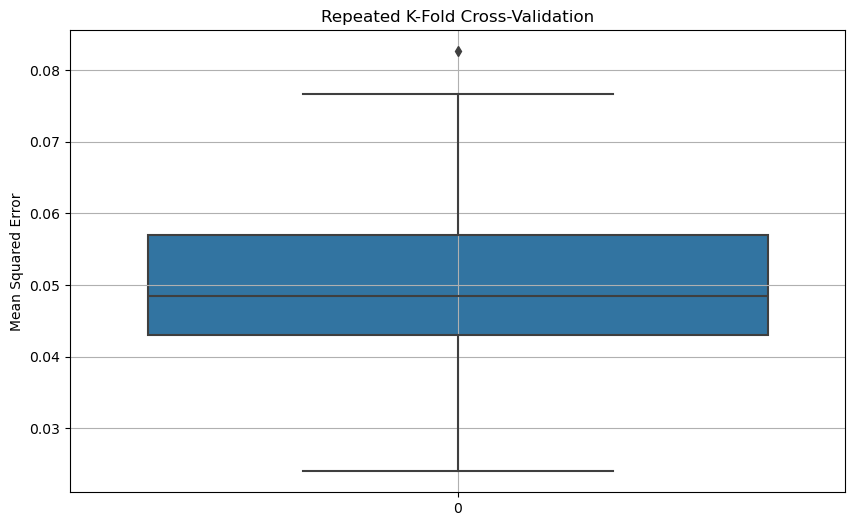

In [12]:
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=42)
mse_scores_rkf = []

for train_index, test_index in rkf.split(X_iris):
    X_train_rkf, X_test_rkf = X_iris[train_index], X_iris[test_index]
    y_train_rkf, y_test_rkf = y_iris[train_index], y_iris[test_index]
    model.fit(X_train_rkf, y_train_rkf)
    y_pred_rkf = model.predict(X_test_rkf)
    mse_scores_rkf.append(mean_squared_error(y_test_rkf, y_pred_rkf))

plt.figure(figsize=(10, 6))
sns.boxplot(data=mse_scores_rkf)
plt.ylabel('Mean Squared Error')
plt.title('Repeated K-Fold Cross-Validation')
plt.grid(True)
plt.show()

This box plot visualizes the distribution of MSE across different repetitions of K-Fold Cross-Validation. The y-axis represents the MSE, and the box plot shows the median, quartiles, and outliers of the performance values.

# Overfitting
## What is Overfitting?
Overfitting occurs when a model learns the details and noise in the training data to such an extent that it performs poorly on new, unseen data. This typically happens when the model is too complex relative to the amount and noisiness of the training data.

## Characteristics of Overfitting
### High accuracy on training data: 
The model performs exceptionally well on the training dataset.
### Poor accuracy on validation/test data: 
The model fails to generalize to new data.
### Complex model: 
The model may have too many parameters relative to the amount of training data, capturing noise along with the signal.
## Causes of Overfitting
### Too complex model: 
Using too many features or a very complex model (e.g., high-degree polynomial regression).
### Insufficient training data: 
Not enough data to learn the general pattern.
### Noise in the data: 
The model learns to fit the noise rather than the actual signal.
## Techniques to Prevent Overfitting
### Simplify the model:

Reduce the number of features.<br>
Choose a simpler algorithm.
### Regularization:

Techniques like L1 (Lasso) and L2 (Ridge) regularization add a penalty for large coefficients.<br>
Helps to keep the model parameters small, thus simplifying the model.
### Pruning (for decision trees):

Remove branches that have little importance.
### Cross-validation:

Ensures the model is validated on different subsets of data, promoting generalization.
### Early stopping (for neural networks):

Stop training when performance on a validation set starts to degrade.
### Data augmentation:

Increase the amount of training data using techniques like rotations, translations, or flipping images in computer vision tasks.

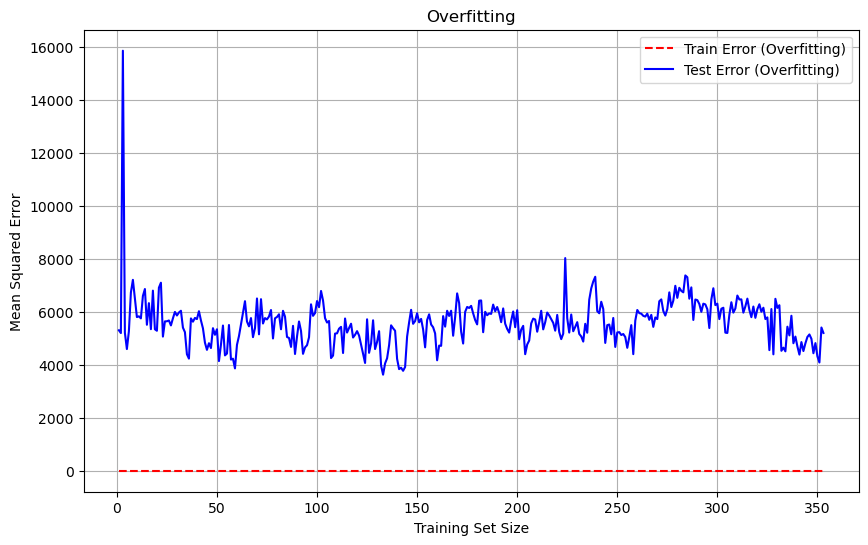

In [13]:
# Decision Tree with no constraints (overfitting)
dt_overfit = DecisionTreeRegressor()
dt_overfit.fit(X_train_diabetes, y_train_diabetes)
y_pred_train = dt_overfit.predict(X_train_diabetes)
y_pred_test = dt_overfit.predict(X_test_diabetes)

train_errors_overfit = []
test_errors_overfit = []

for i in range(1, len(X_train_diabetes) + 1):
    dt_overfit.fit(X_train_diabetes[:i], y_train_diabetes[:i])
    train_errors_overfit.append(mean_squared_error(y_train_diabetes[:i], dt_overfit.predict(X_train_diabetes[:i])))
    test_errors_overfit.append(mean_squared_error(y_test_diabetes, dt_overfit.predict(X_test_diabetes)))

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_errors_overfit) + 1), train_errors_overfit, linestyle='--', color='r', label='Train Error (Overfitting)')
plt.plot(range(1, len(test_errors_overfit) + 1), test_errors_overfit, linestyle='-', color='b', label='Test Error (Overfitting)')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.title('Overfitting')
plt.legend()
plt.grid(True)
plt.show()

This graph compares the training and test errors of a Decision Tree Regressor with no constraints (overfitting). The x-axis represents the training set size, while the y-axis represents the MSE. The red dashed line with markers shows the training error, and the blue dashed line with markers shows the test error. The large gap between the training and test errors indicates overfitting.

# Underfitting
## What is Underfitting?
Underfitting occurs when a model is too simple to capture the underlying patterns in the data. It performs poorly on both the training data and new data.

## Characteristics of Underfitting
### Poor accuracy on training data: 
The model does not perform well even on the training dataset.
### Poor accuracy on validation/test data: 
The model fails to generalize to new data.
### Simple model: 
The model is too simplistic to learn the underlying pattern of the data.
## Causes of Underfitting
### Too simple model: 
Using a model that is not complex enough to capture the patterns in the data.
### Insufficient features: 
Not enough relevant features to capture the underlying pattern.
### Too much regularization: 
Excessive use of regularization techniques can simplify the model too much.
## Techniques to Address Underfitting
### Increase model complexity:

Use a more complex model or algorithm.<br>
Add more features.<br>
### Reduce regularization:

Decrease the regularization parameter.
### Feature engineering:

Create new features that capture the underlying pattern in the data.
### Increase training time (for neural networks):

Train the model for more epochs.
### Parameter tuning:

Adjust hyperparameters to better capture the data's complexity.

C:\Users\Muhammad Ahtasham\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


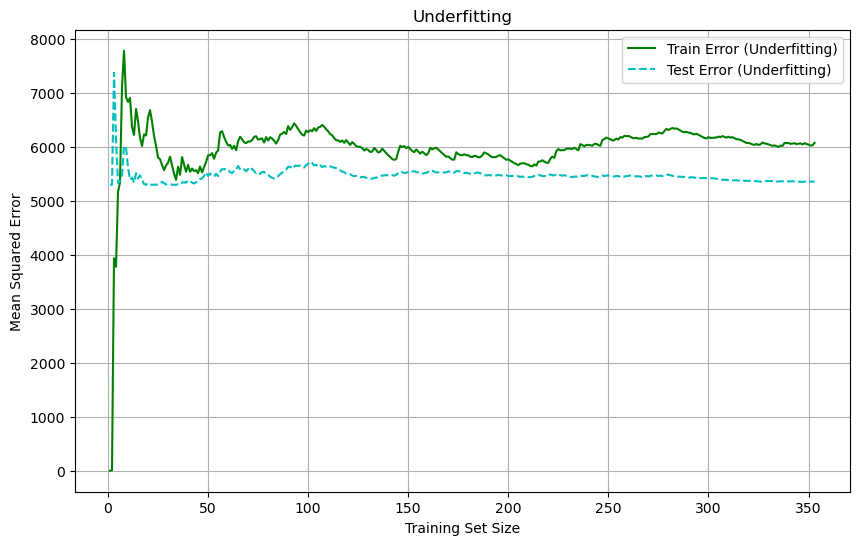

In [14]:
# Lasso Regression with high alpha (underfitting)
lasso_underfit = Lasso(alpha=10)
lasso_underfit.fit(X_train_diabetes, y_train_diabetes)
y_pred_train_lasso = lasso_underfit.predict(X_train_diabetes)
y_pred_test_lasso = lasso_underfit.predict(X_test_diabetes)

train_errors_underfit = []
test_errors_underfit = []

for i in range(1, len(X_train_diabetes) + 1):
    lasso_underfit.fit(X_train_diabetes[:i], y_train_diabetes[:i])
    train_errors_underfit.append(mean_squared_error(y_train_diabetes[:i], lasso_underfit.predict(X_train_diabetes[:i])))
    test_errors_underfit.append(mean_squared_error(y_test_diabetes, lasso_underfit.predict(X_test_diabetes)))

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_errors_underfit) + 1), train_errors_underfit, linestyle='-', color='g', label='Train Error (Underfitting)')
plt.plot(range(1, len(test_errors_underfit) + 1), test_errors_underfit, linestyle='--', color='c', label='Test Error (Underfitting)')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.title('Underfitting')
plt.legend()
plt.grid(True)
plt.show()

This graph compares the training and test errors of a Lasso Regression model with a high alpha value (underfitting). The x-axis represents the training set size, while the y-axis represents the MSE. The green dashed line with markers shows the training error, and the cyan dashed line with markers shows the test error. Both training and test errors are high, indicating underfitting.

## Cross-Validation MSE Scores

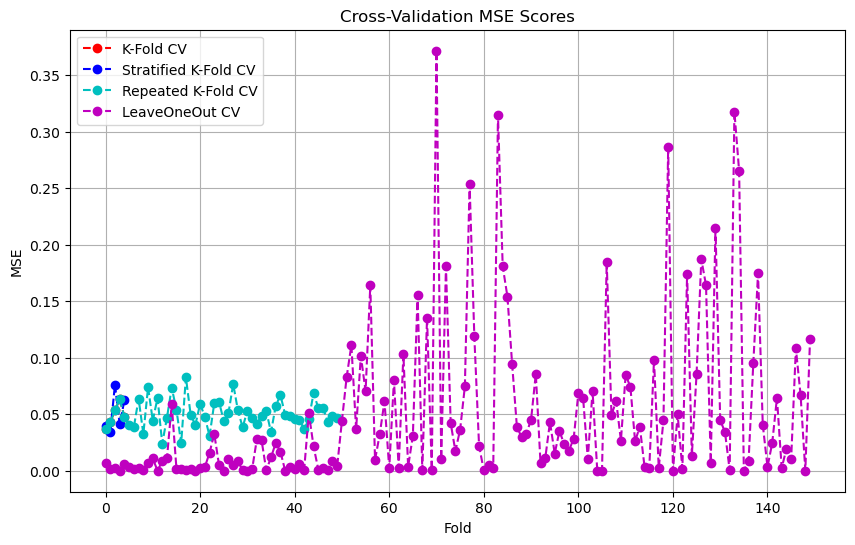

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(mse_scores, marker='o', linestyle='--', color='r', label='K-Fold CV')
plt.plot(mse_scores_skf, marker='o', linestyle='--', color='b', label='Stratified K-Fold CV')
plt.plot(mse_scores_rkf, marker='o', linestyle='--', color='c', label='Repeated K-Fold CV')
plt.plot(mse_scores_loo, marker='o', linestyle='--', color='m', label='LeaveOneOut CV')

plt.xlabel('Fold')
plt.ylabel('MSE')
plt.title('Cross-Validation MSE Scores')
plt.legend()
plt.grid(True)
plt.show()

his graph visualizes the Mean Squared Error (MSE) scores obtained from different cross-validation techniques applied to the Diabetes dataset. The x-axis represents the fold number, while the y-axis represents the MSE.

### Red Line (K-Fold CV): 
Shows the MSE scores for each fold using the standard K-Fold Cross-Validation technique.
### Blue Line (Stratified K-Fold CV): 
Displays the MSE scores for each fold using Stratified K-Fold Cross-Validation, which ensures that each fold has a similar class distribution.
### Cyan Line (Repeated K-Fold CV): 
Illustrates the MSE scores for each fold using Repeated K-Fold Cross-Validation, which repeats the K-Fold process multiple times to provide a more robust performance estimate.
### Magenta Line (Leave-One-Out CV): 
Represents the MSE scores for each fold using Leave-One-Out Cross-Validation, where each sample is used once as the test set, providing a very granular view of model performance.

## Overfitting vs. Underfitting: Training and Test Errors

C:\Users\Muhammad Ahtasham\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\Muhammad Ahtasham\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


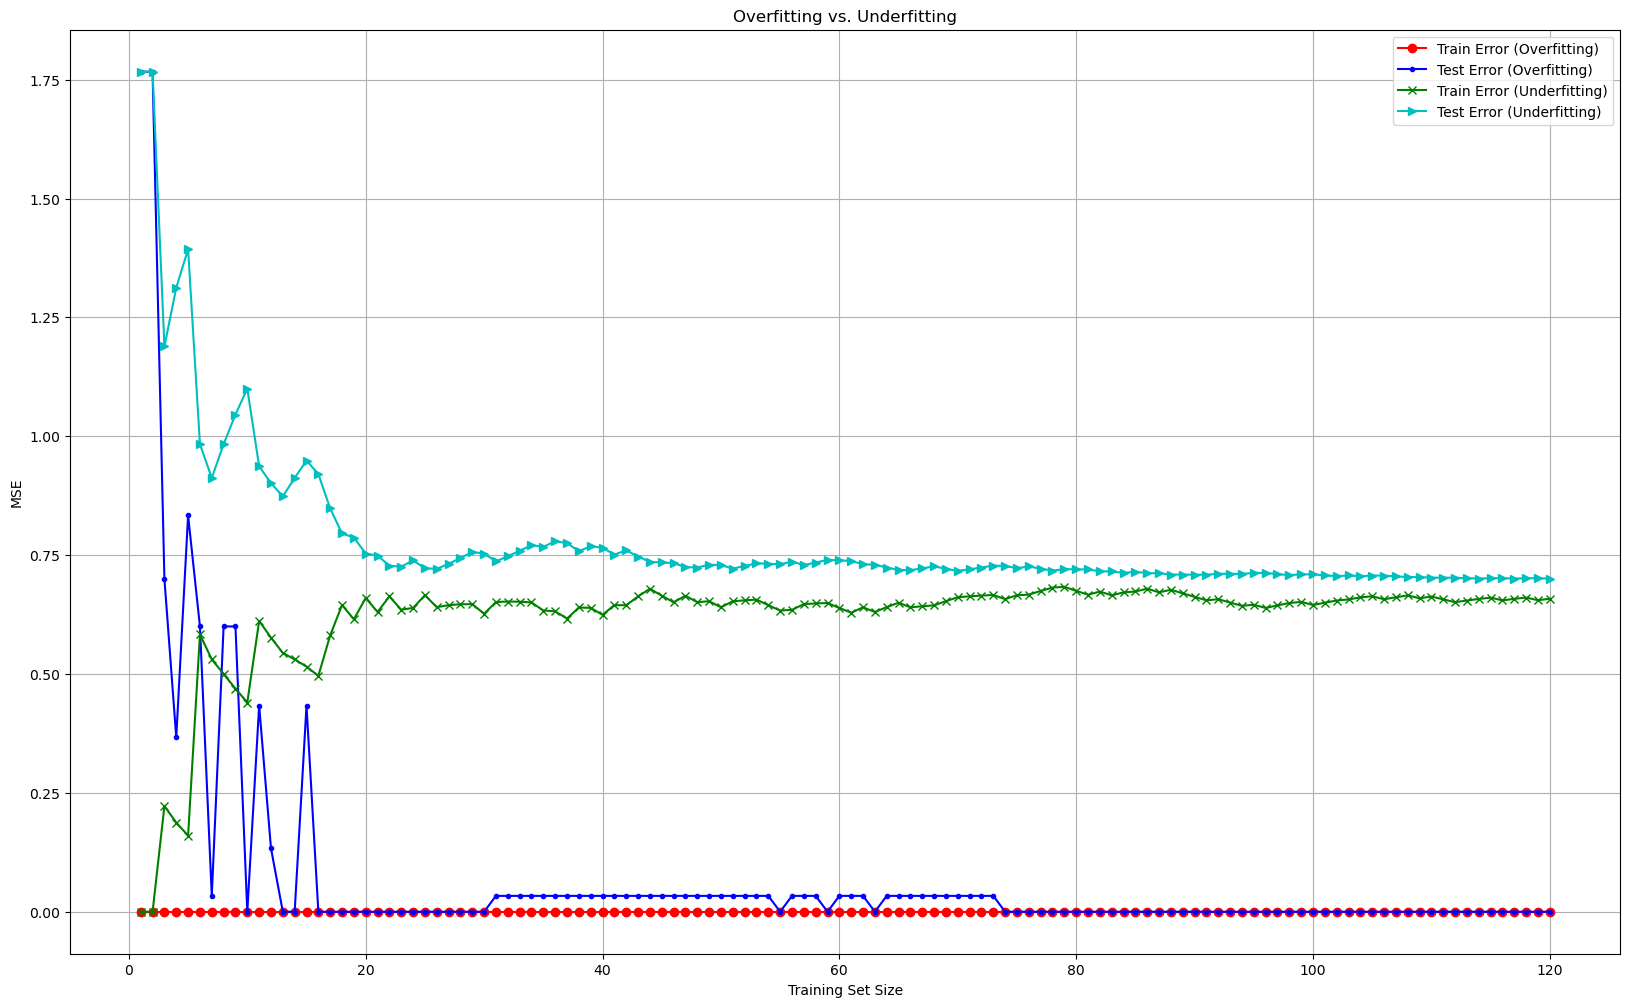

In [16]:
plt.figure(figsize=(20, 12))
train_sizes = np.arange(1, len(X_train) + 1)
train_errors_overfit = []
test_errors_overfit = []
train_errors_underfit = []
test_errors_underfit = []

# Overfitting model (Decision Tree)
for i in train_sizes:
    dt_overfit.fit(X_train[:i], y_train[:i])
    train_errors_overfit.append(mean_squared_error(y_train[:i], dt_overfit.predict(X_train[:i])))
    test_errors_overfit.append(mean_squared_error(y_test, dt_overfit.predict(X_test)))

# Underfitting model (Lasso)
for i in train_sizes:
    lasso_underfit.fit(X_train[:i], y_train[:i])
    train_errors_underfit.append(mean_squared_error(y_train[:i], lasso_underfit.predict(X_train[:i])))
    test_errors_underfit.append(mean_squared_error(y_test, lasso_underfit.predict(X_test)))

plt.plot(train_sizes, train_errors_overfit, marker='o', linestyle='-', color='r', label='Train Error (Overfitting)')
plt.plot(train_sizes, test_errors_overfit, marker='.', linestyle='-', color='b', label='Test Error (Overfitting)')
plt.plot(train_sizes, train_errors_underfit, marker='x', linestyle='-', color='g', label='Train Error (Underfitting)')
plt.plot(train_sizes, test_errors_underfit, marker='>', linestyle='-', color='c', label='Test Error (Underfitting)')

plt.xlabel('Training Set Size')
plt.ylabel('MSE')
plt.title('Overfitting vs. Underfitting')
plt.legend()
plt.grid(True)
plt.show()

This graph compares the training and test errors for models that exhibit overfitting and underfitting behaviors. The x-axis represents the training set size, while the y-axis represents the Mean Squared Error (MSE).

### Train Error (Overfitting): 
The red line with circle markers shows the MSE on the training set for a Decision Tree Regressor with no constraints. As the training set size increases, the training error remains low, indicating that the model is fitting the training data very well, potentially even the noise.

### Test Error (Overfitting): 
The blue line with dot markers shows the MSE on the test set for the same overfitted model. The test error is significantly higher than the training error, indicating that the model does not generalize well to unseen data due to overfitting.

### Train Error (Underfitting): 
The green line with cross markers shows the MSE on the training set for a Lasso Regression model with a high alpha value. The training error is high across different training set sizes, indicating that the model is too simple and cannot capture the underlying patterns in the data.

### Test Error (Underfitting): 
The cyan line with triangle markers shows the MSE on the test set for the same underfitted model. The test error is also high, indicating poor performance on unseen data due to underfitting.